**Here is my implementation of batch gradient descent for a simple linear hypothesis regression from scratch**

I will take a few datapoints and try implementing batch gradient descent from scratch to find the best parameters for the hypothesis
        
        dataset:
        x   y
        1   2.8
        2   5.2
        3   6.9
        4   9.1
        5  11.3
    

# Stochastic Gradient Descent

Batch methods, such as limited memory BFGS, which use the full training set to compute the next update to parameters at each iteration tend to converge very well to local optima. They are also straight forward to get working provided a good off the shelf implementation (e.g. minFunc) because they have very few hyper-parameters to tune. However, often in practice computing the cost and gradient for the entire training set can be very slow and sometimes intractable on a single machine if the dataset is too big to fit in main memory. Another issue with batch optimization methods is that they don’t give an easy way to incorporate new data in an ‘online’ setting. Stochastic Gradient Descent (SGD) addresses both of these issues by following the negative gradient of the objective after seeing only a single or a few training examples.

In [77]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# we will take the equation y=b0+b1x
# our task is to find the best b0,b1

# step1: we will create the dataset as numpy array
input = np.array([[1,2.8],[2,5.2],[3,6.9],[4,9.1],[5,11.3]])
input

array([[ 1. ,  2.8],
       [ 2. ,  5.2],
       [ 3. ,  6.9],
       [ 4. ,  9.1],
       [ 5. , 11.3]])

In [79]:
# I am initializing starting values.
lr=1e-5 # learning rate is a hyperparameter, for now I am starting with 0.1
# In SGD, each gradient is one sample → much bigger. So you need a smaller learning rate, e.g., lr = 1e-5 to 1e-4.
b0=0
b1=0
n= input.shape[0]
iterations=10000 # this is also a hyperparameter
tol = 1e-6 # tol = tolerance

In [80]:
# symbolic derivative
# symbolic derivative is we caluclate the derivative by hand and apply the formula directly here. which is the fastest method but can prone to errors since we do it manually
# I am using mean square error(mean of squre of error) to model my loss function
def symbolic_derivative_stochastic(ip_x,ip_y,b0,b1):
    diri_b0=0
    diri_b1=0
    predicted= b0+b1*ip_x
    expected=ip_y
    error= predicted- expected
    # we need to calculate partial derivatives for b0 and b1 and combine together to form the gradient we have manually calculated the f'(x) for db0 and db1 (check my notes)
    diri_b0= error
    diri_b1= error*ip_x

    dJ_dw = (2)*(diri_b0) # In stochastic gradient descent, you don’t divide by n because each update is based on a single sample.
    dJ_db= (2)*(diri_b1)
    return dJ_db, dJ_dw # both paritial derivatives together form the gradient


In [81]:
# calculating mean square error for me to stop the iteration somewhere.
# for stocastic we will calculate individual losses and cululate after each iteration
# with this MSE loss i can write a stopping condition for iteration
def mse_loss(x,y, b0, b1):
    error = (y-(b0+b1*x))**2
    return error

In [82]:
prev_loss = float("inf")
tol = 1e-6

for i in range(iterations):
    curr_loss = 0
    # np.random.shuffle(input) # shuffling makes SGD more robust and avoids getting stuck in cyclic patterns.
    for ip in input:
        grad_b0, grad_b1 = symbolic_derivative_stochastic(ip[0], ip[1], b0, b1)
        b0 -= lr * grad_b0
        b1 -= lr * grad_b1

        curr_loss += mse_loss(ip[0], ip[1], b0, b1)

    curr_loss /= n

    if i % 100 == 0:
        print(f"iter {i}: loss={curr_loss:.6f}, b0={b0:.4f}, b1={b1:.4f}")

    if abs(prev_loss - curr_loss) < tol:
        print(f"Converged at iter {i}: loss={curr_loss:.6f}, b0={b0:.4f}, b1={b1:.4f}")
        break

    prev_loss = curr_loss


iter 0: loss=58.552814, b0=0.0025, b1=0.0007
iter 100: loss=51.830382, b0=0.2485, b1=0.0690
iter 200: loss=45.907257, b0=0.4800, b1=0.1329
iter 300: loss=40.688581, b0=0.6980, b1=0.1927
iter 400: loss=36.090753, b0=0.9032, b1=0.2487
iter 500: loss=32.040094, b0=1.0965, b1=0.3010
iter 600: loss=28.471674, b0=1.2787, b1=0.3500
iter 700: loss=25.328263, b0=1.4503, b1=0.3957
iter 800: loss=22.559430, b0=1.6120, b1=0.4385
iter 900: loss=20.120724, b0=1.7645, b1=0.4785
iter 1000: loss=17.972975, b0=1.9083, b1=0.5158
iter 1100: loss=16.081657, b0=2.0439, b1=0.5506
iter 1200: loss=14.416345, b0=2.1719, b1=0.5831
iter 1300: loss=12.950224, b0=2.2927, b1=0.6134
iter 1400: loss=11.659663, b0=2.4068, b1=0.6417
iter 1500: loss=10.523834, b0=2.5145, b1=0.6681
iter 1600: loss=9.524382, b0=2.6163, b1=0.6926
iter 1700: loss=8.645131, b0=2.7125, b1=0.7154
iter 1800: loss=7.871823, b0=2.8035, b1=0.7367
iter 1900: loss=7.191895, b0=2.8895, b1=0.7564
iter 2000: loss=6.594274, b0=2.9710, b1=0.7747
iter 2100

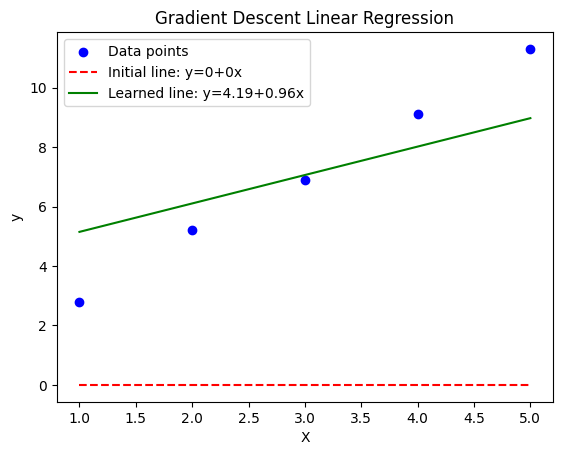

In [83]:
X = input[:,0]
y = input[:,1]

# Initial parameters
b0_init = 0
b1_init = 0

# Learned parameters from gradient descent
b0_learned = b0
b1_learned = b1

# Plot data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot initial line
y_init = b0_init + b1_init * X
plt.plot(X, y_init, 'r--', label=f'Initial line: y={b0_init}+{b1_init}x')

# Plot learned line
y_final = b0_learned + b1_learned * X
plt.plot(X, y_final, 'g-', label=f'Learned line: y={b0_learned:.2f}+{b1_learned:.2f}x')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Linear Regression')
plt.legend()
plt.show()